In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('price_data.csv',parse_dates=['price_date'],dayfirst=True)

In [ ]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [ ]:
df['id'].value_counts()

038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: id, Length: 16096, dtype: int64

In [ ]:
df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [ ]:
df.groupby('price_date').mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date,,,,,,
2015-01-01,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861
2015-02-01,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016
2015-03-01,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121
2015-04-01,0.143259,0.056035,0.030492,43.288439,10.647277,6.423156
2015-05-01,0.143534,0.055359,0.030393,43.315388,10.602453,6.390806
2015-06-01,0.143731,0.055255,0.029902,43.347320,10.415769,6.281304
2015-07-01,0.143683,0.055369,0.030636,43.345012,10.642236,6.421464
2015-08-01,0.137933,0.053605,0.030717,43.365366,10.661678,6.431518
2015-09-01,0.137933,0.053532,0.030606,43.351874,10.602979,6.391788


In [ ]:
df.groupby('price_date').median()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date,,,,,,
2015-01-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-02-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-03-01,0.148825,0.085390,0.0,44.266931,0.0,0.0
2015-04-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-05-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-06-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-07-01,0.148825,0.085570,0.0,44.266930,0.0,0.0
2015-08-01,0.144524,0.085483,0.0,44.266930,0.0,0.0
2015-09-01,0.144698,0.085483,0.0,44.266930,0.0,0.0


In [ ]:
df.groupby('id').mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [ ]:
df.groupby('id').median()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.073719,40.728885,24.437330,16.291555
0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.444710,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.122157,0.100029,0.069027,40.647429,24.388455,16.258972
00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.141684,0.116282,0.080223,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153159,0.130578,0.091448,41.228885,24.937330,16.791555


In [ ]:
company_price_df = pd.DataFrame(df.groupby('id').mean())

In [ ]:
company_price_df.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [27]:
output_df = pd.read_csv('output.csv',index_col='id')

In [28]:
output_df.head()

,churn
id,
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0
149d57cf92fc41cf94415803a877cb4b,0


In [29]:
final_price_df = pd.merge(left=company_price_df,right=output_df,how='inner',left_index=True,right_index=True)

In [30]:
final_price_df.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
id,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0


In [31]:
final_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_off_peak_var  14606 non-null  float64
 1   price_peak_var      14606 non-null  float64
 2   price_mid_peak_var  14606 non-null  float64
 3   price_off_peak_fix  14606 non-null  float64
 4   price_peak_fix      14606 non-null  float64
 5   price_mid_peak_fix  14606 non-null  float64
 6   churn               14606 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.4+ MB


In [32]:
final_price_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [35]:
print('Percentage of customer churn: {:.2f}%'.format(1419/13187*100))

Percentage of customer churn: 10.76%


In [36]:
final_price_df.reset_index(inplace=True)

In [37]:
final_price_df.head(2)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,0


# Data Visualizations

Text(0.5, 1.02, 'PairPlot of the Data')

<Figure size 3000x1500 with 0 Axes>

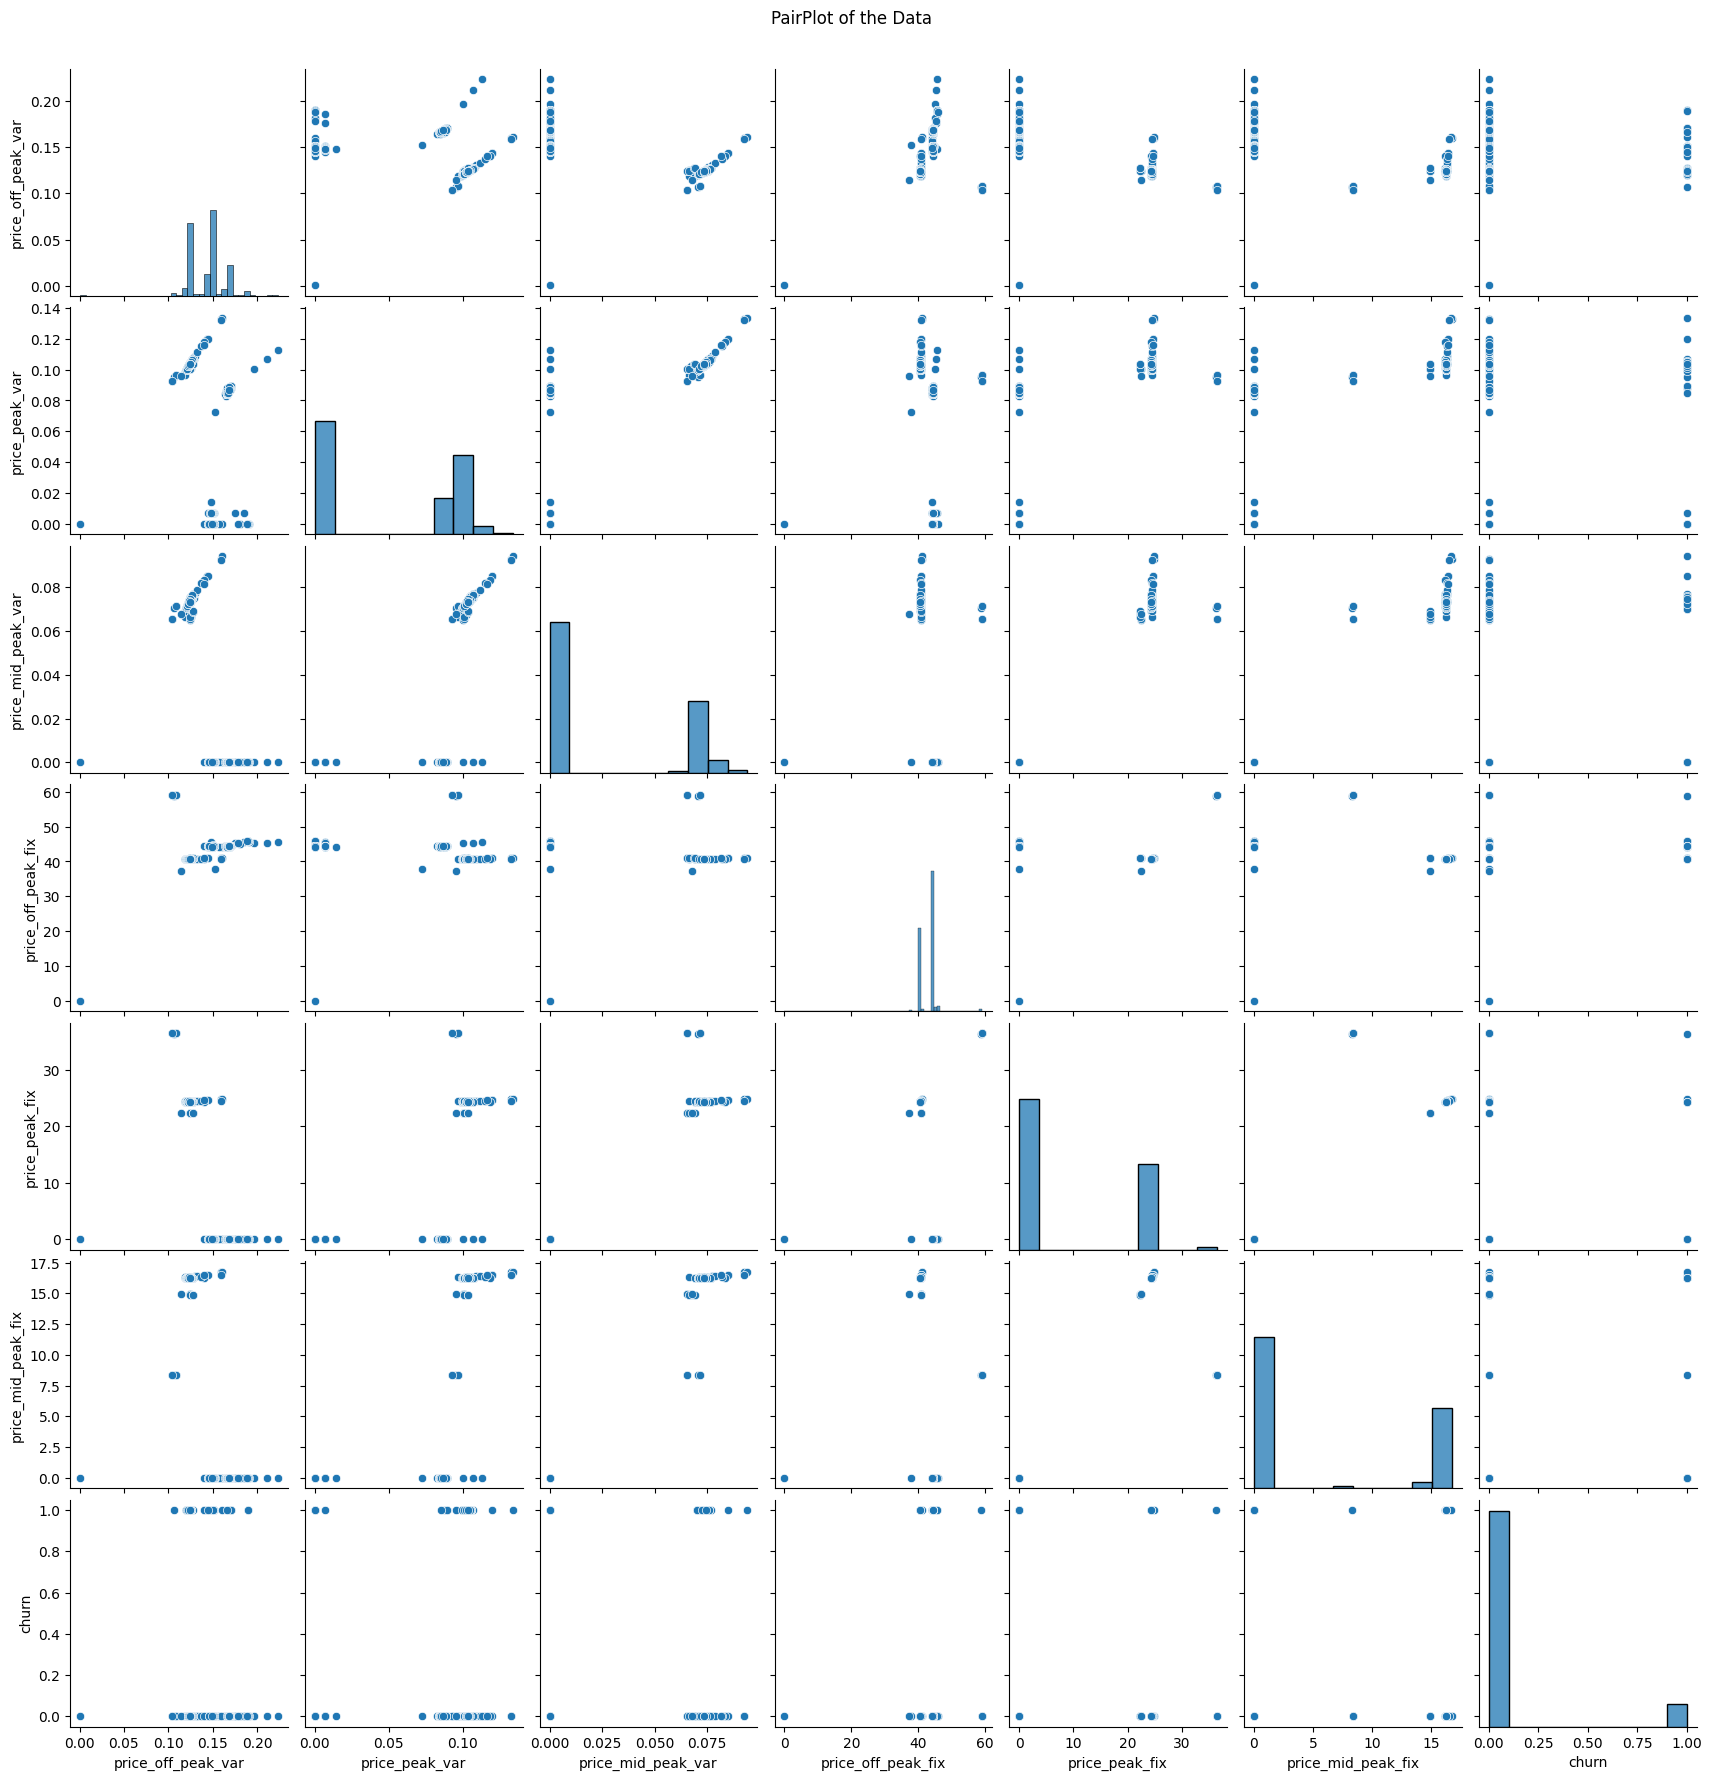

In [39]:
plt.figure(figsize=(30,15))
sns.pairplot(final_price_df.sample(500))
plt.suptitle('PairPlot of the Data',x=0.5,y=1.02,fontsize='large',ha='center')

Text(0.5, 1.02, 'Feature Distribution')

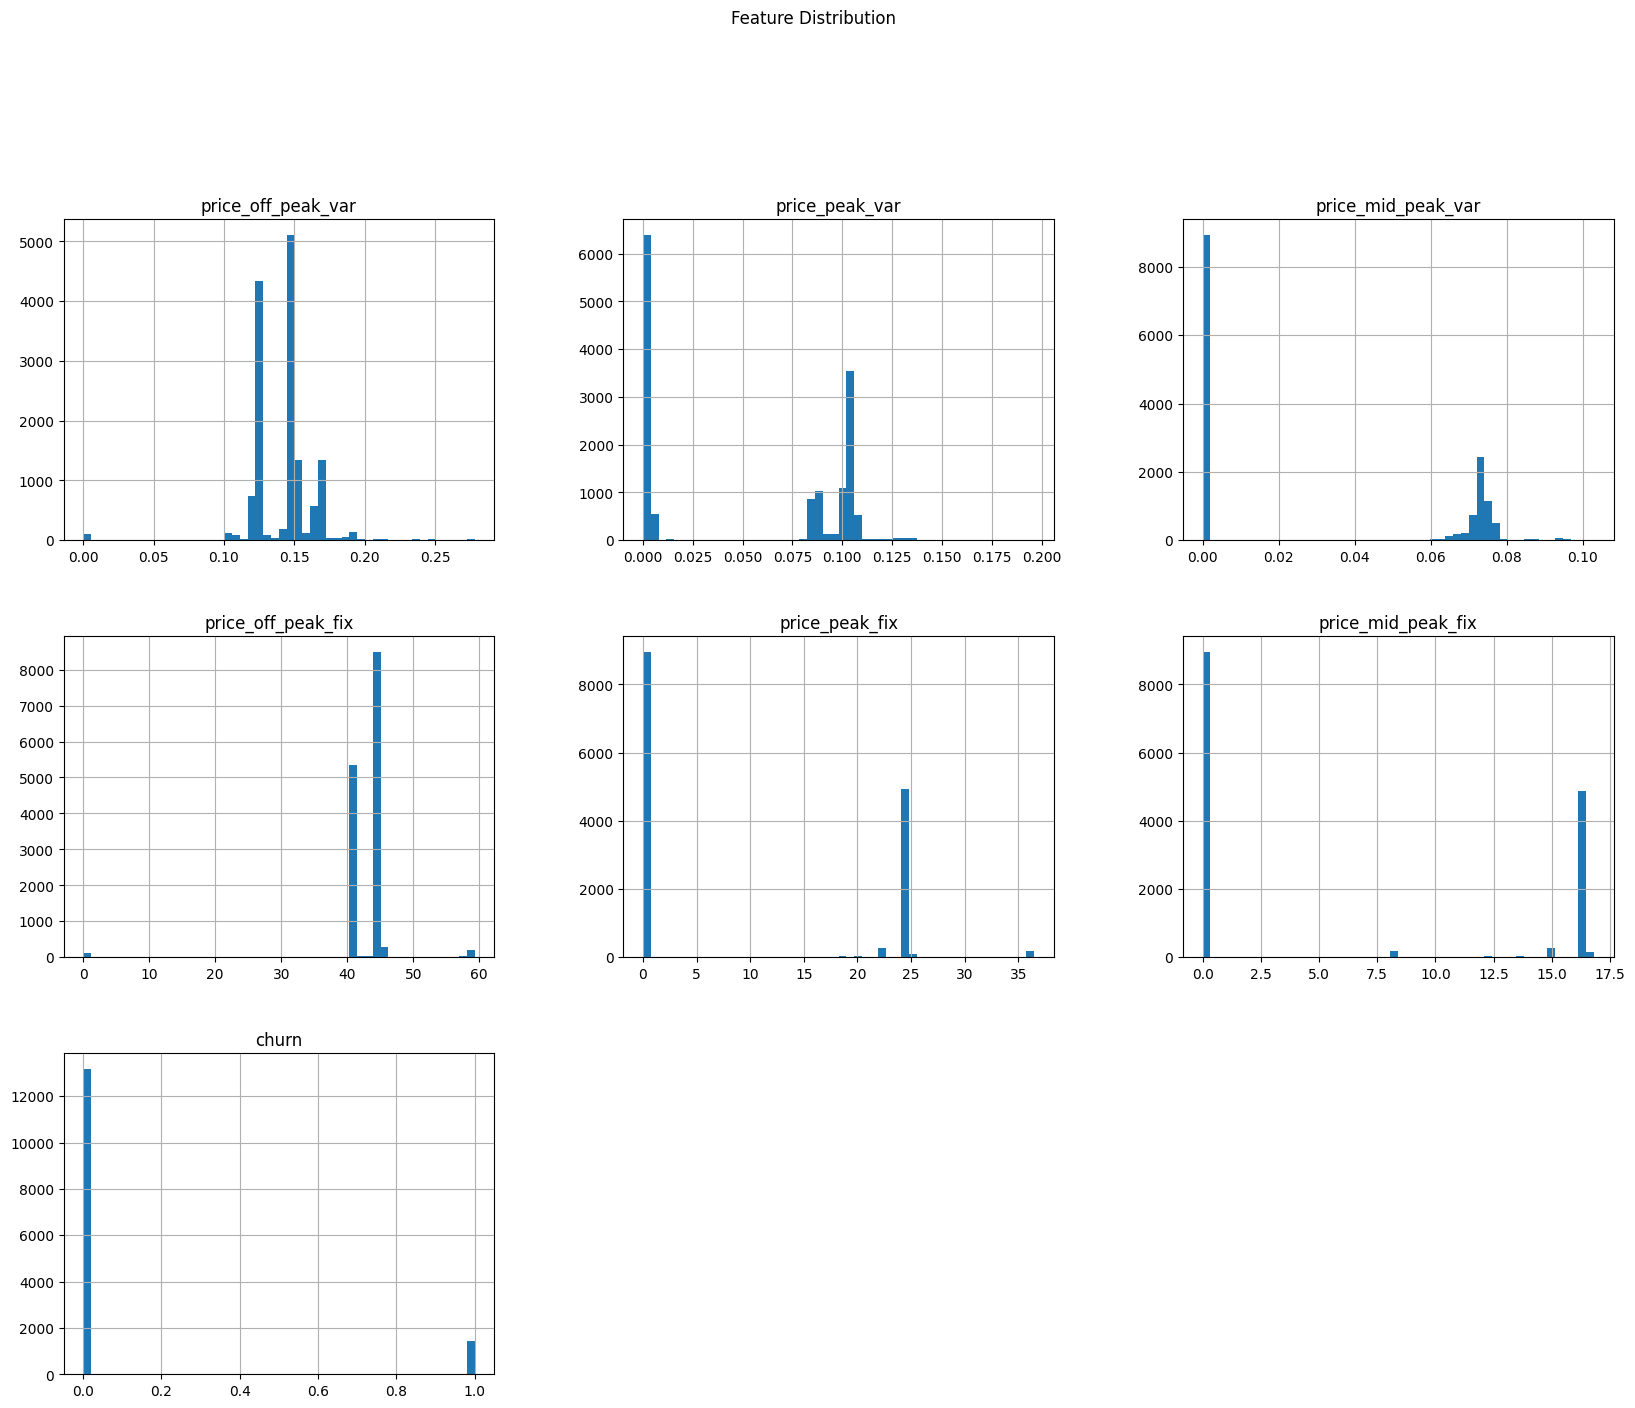

In [43]:
final_price_df.hist(bins=50,figsize=(20,15))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.02, 'BoxPlot')

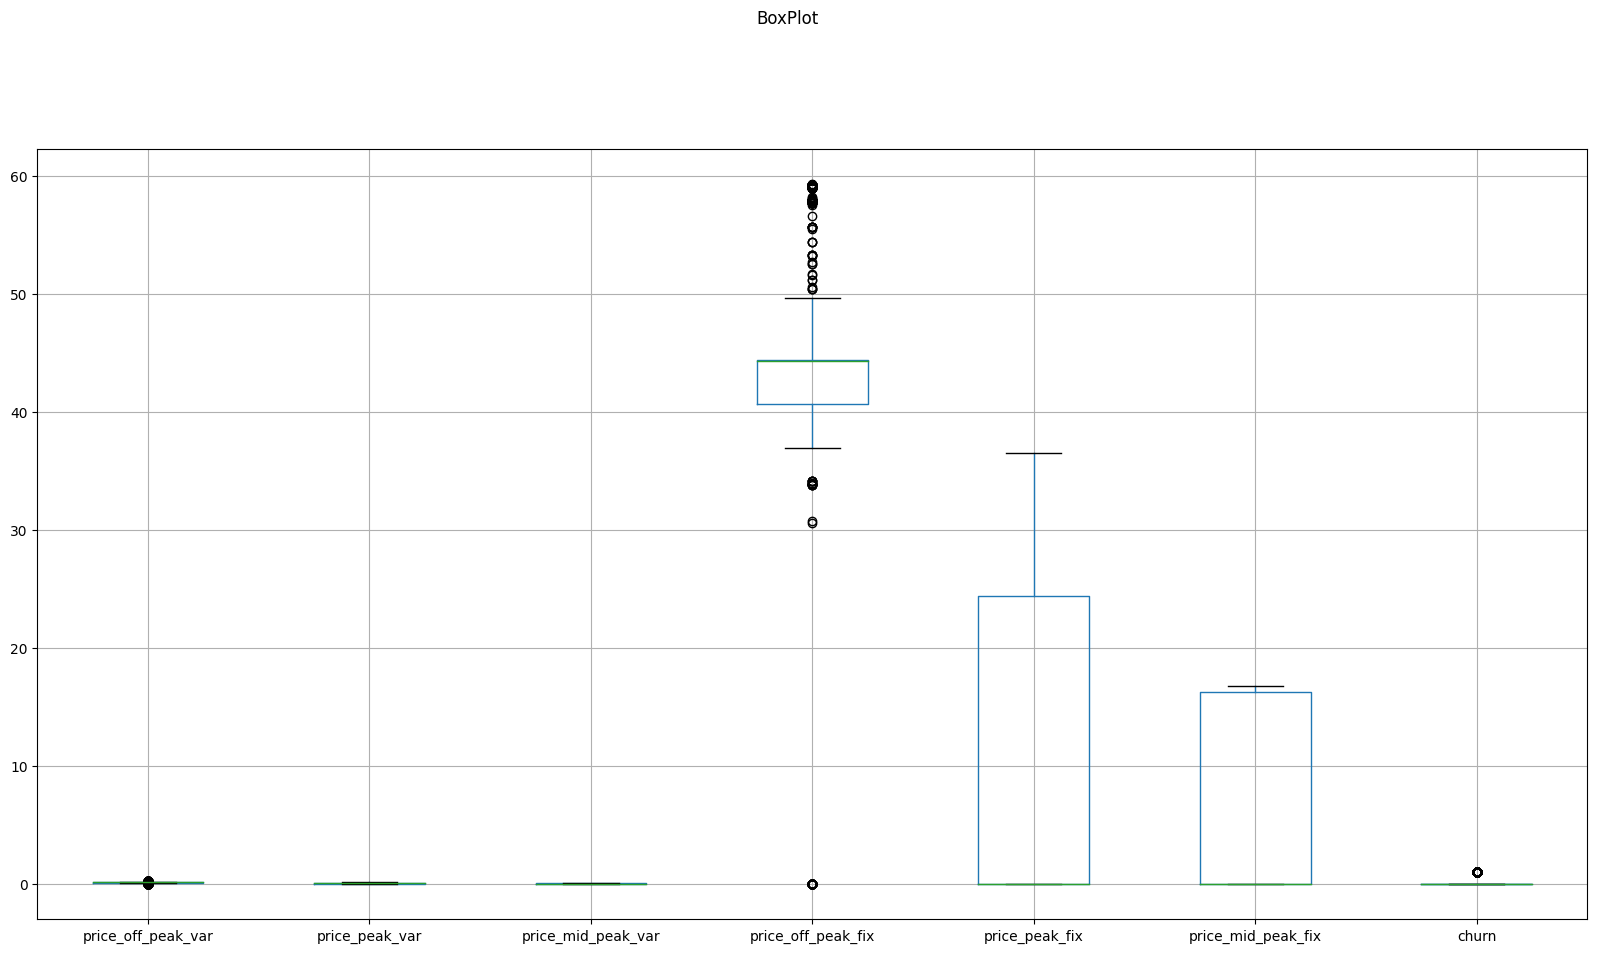

In [45]:
final_price_df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot',x=0.5,y=1.02,ha='center',fontsize='large')

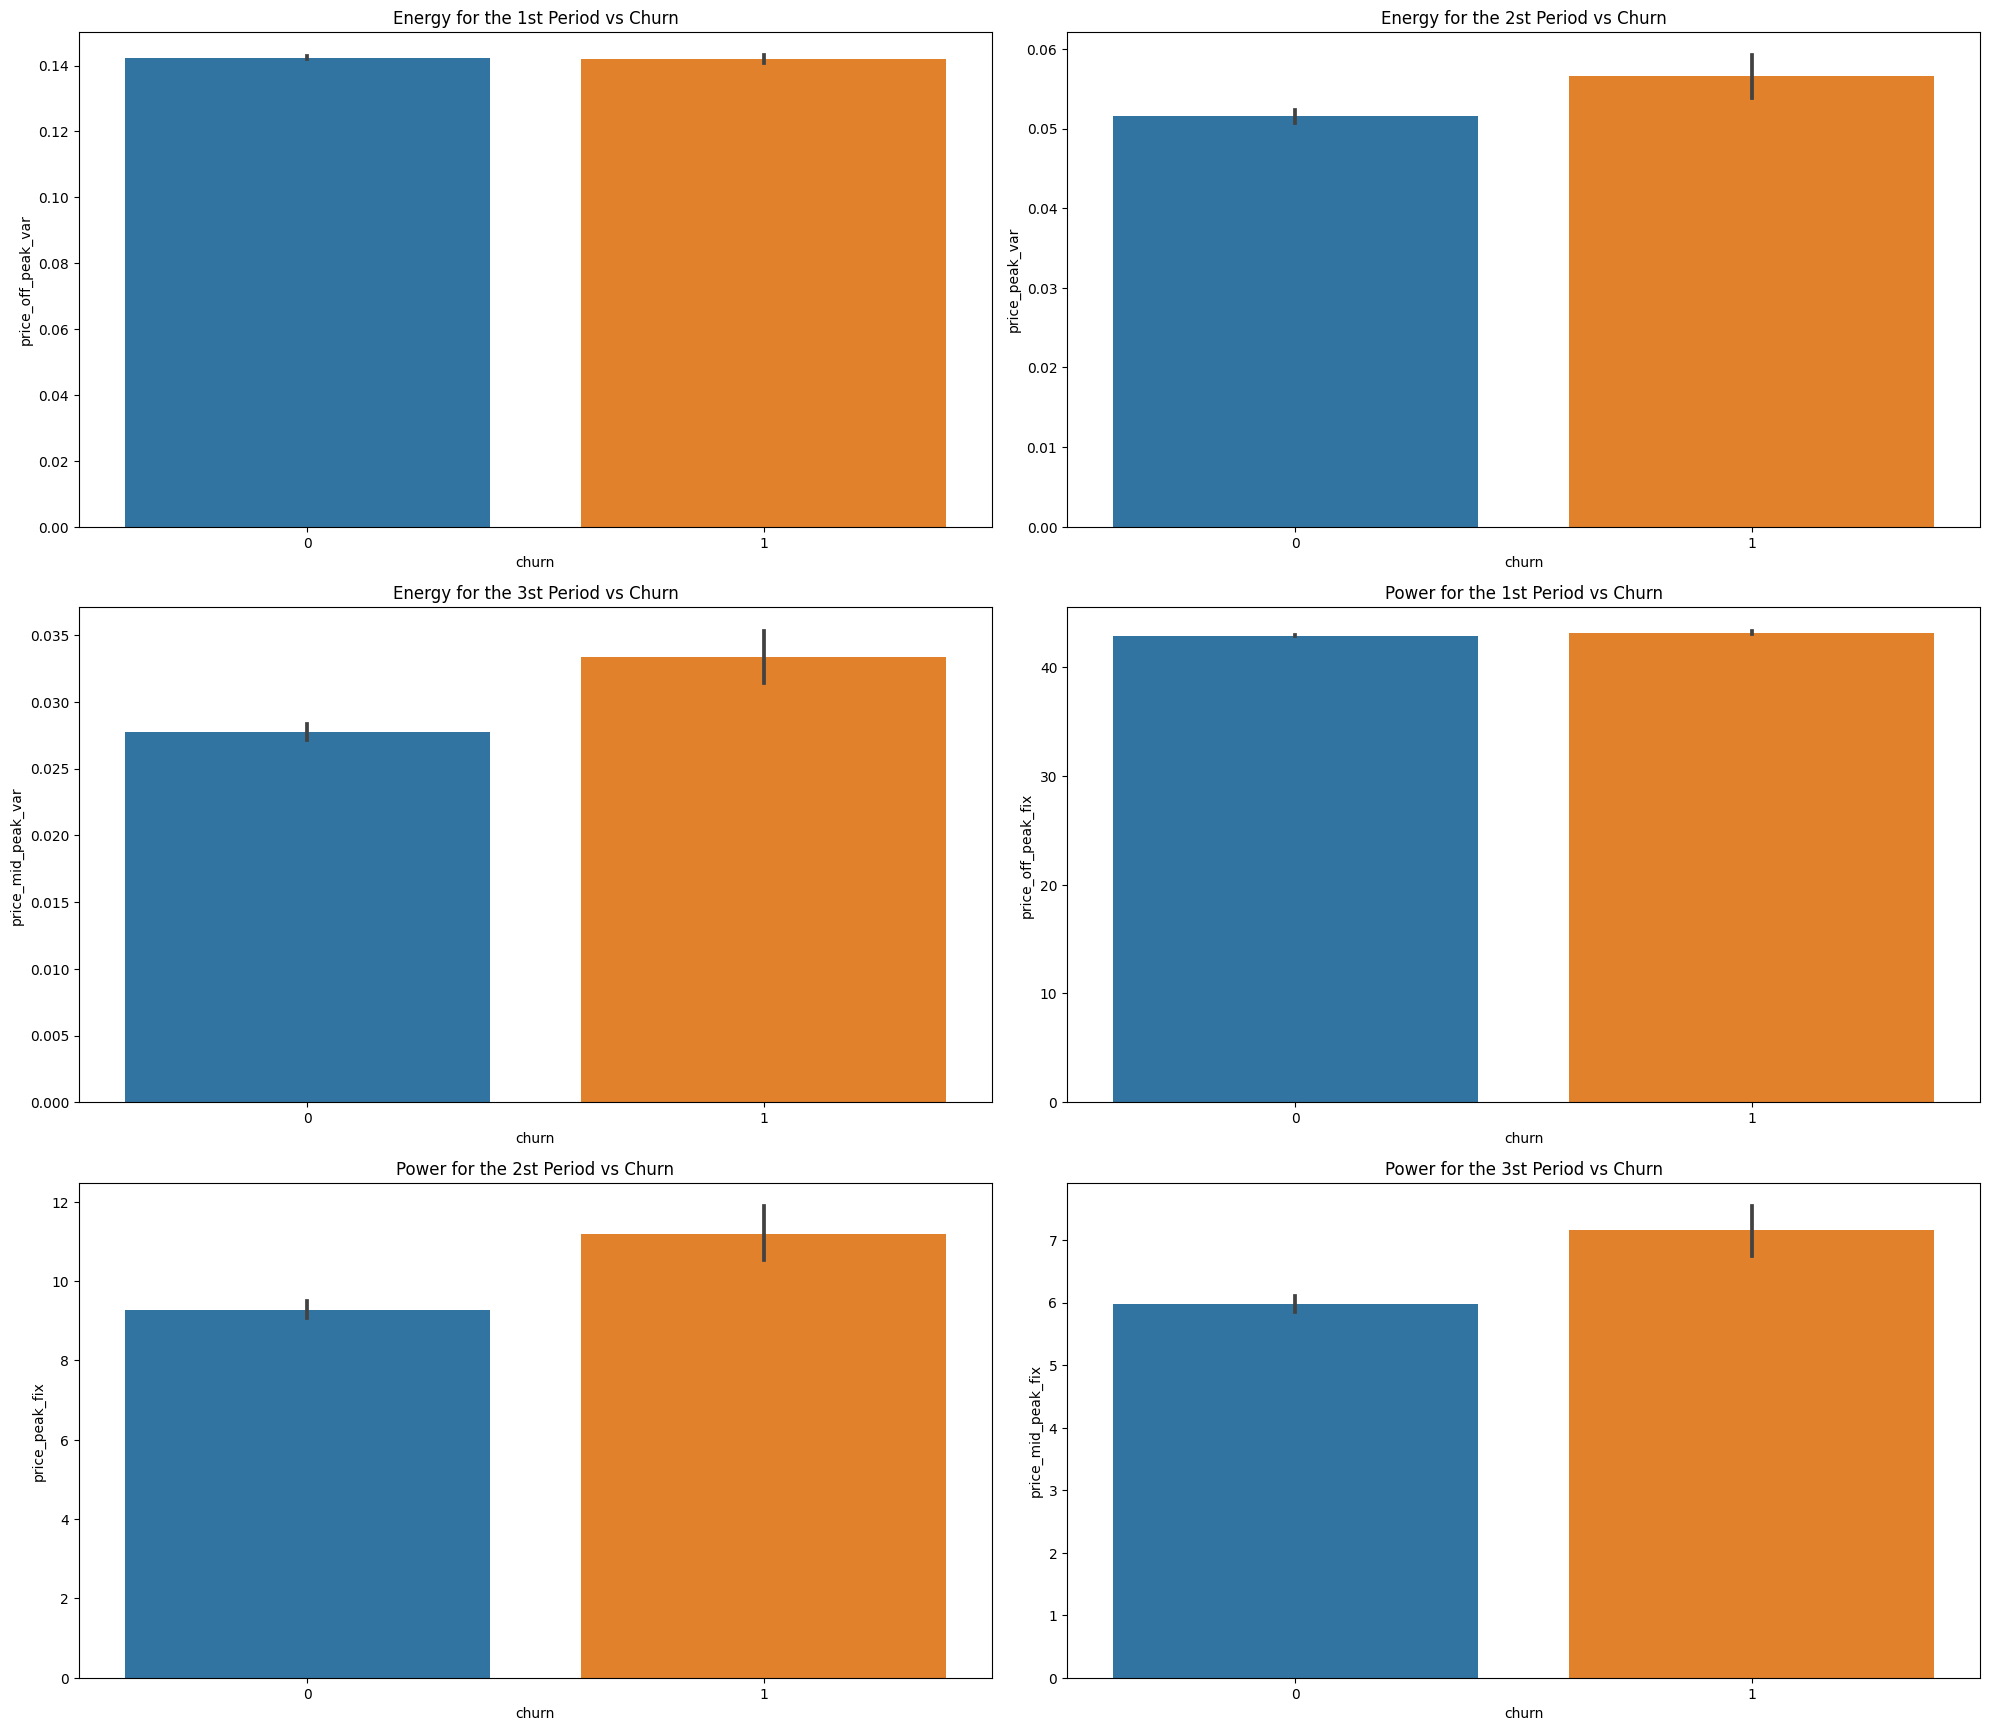

In [50]:
plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.barplot(data=final_price_df,x='churn',y='price_off_peak_var')
plt.title('Energy for the 1st Period vs Churn')

plt.subplot(7,2,2)
sns.barplot(data=final_price_df,x='churn',y='price_peak_var')
plt.title('Energy for the 2st Period vs Churn')

plt.subplot(7,2,3)
sns.barplot(data=final_price_df,x='churn',y='price_mid_peak_var')
plt.title('Energy for the 3st Period vs Churn')

plt.subplot(7,2,4)
sns.barplot(data=final_price_df,x='churn',y='price_off_peak_fix')
plt.title('Power for the 1st Period vs Churn')

plt.subplot(7,2,5)
sns.barplot(data=final_price_df,x='churn',y='price_peak_fix')
plt.title('Power for the 2st Period vs Churn')

plt.subplot(7,2,6)
sns.barplot(data=final_price_df,x='churn',y='price_mid_peak_fix')
plt.title('Power for the 3st Period vs Churn')

plt.tight_layout()

# Time Series Analysis

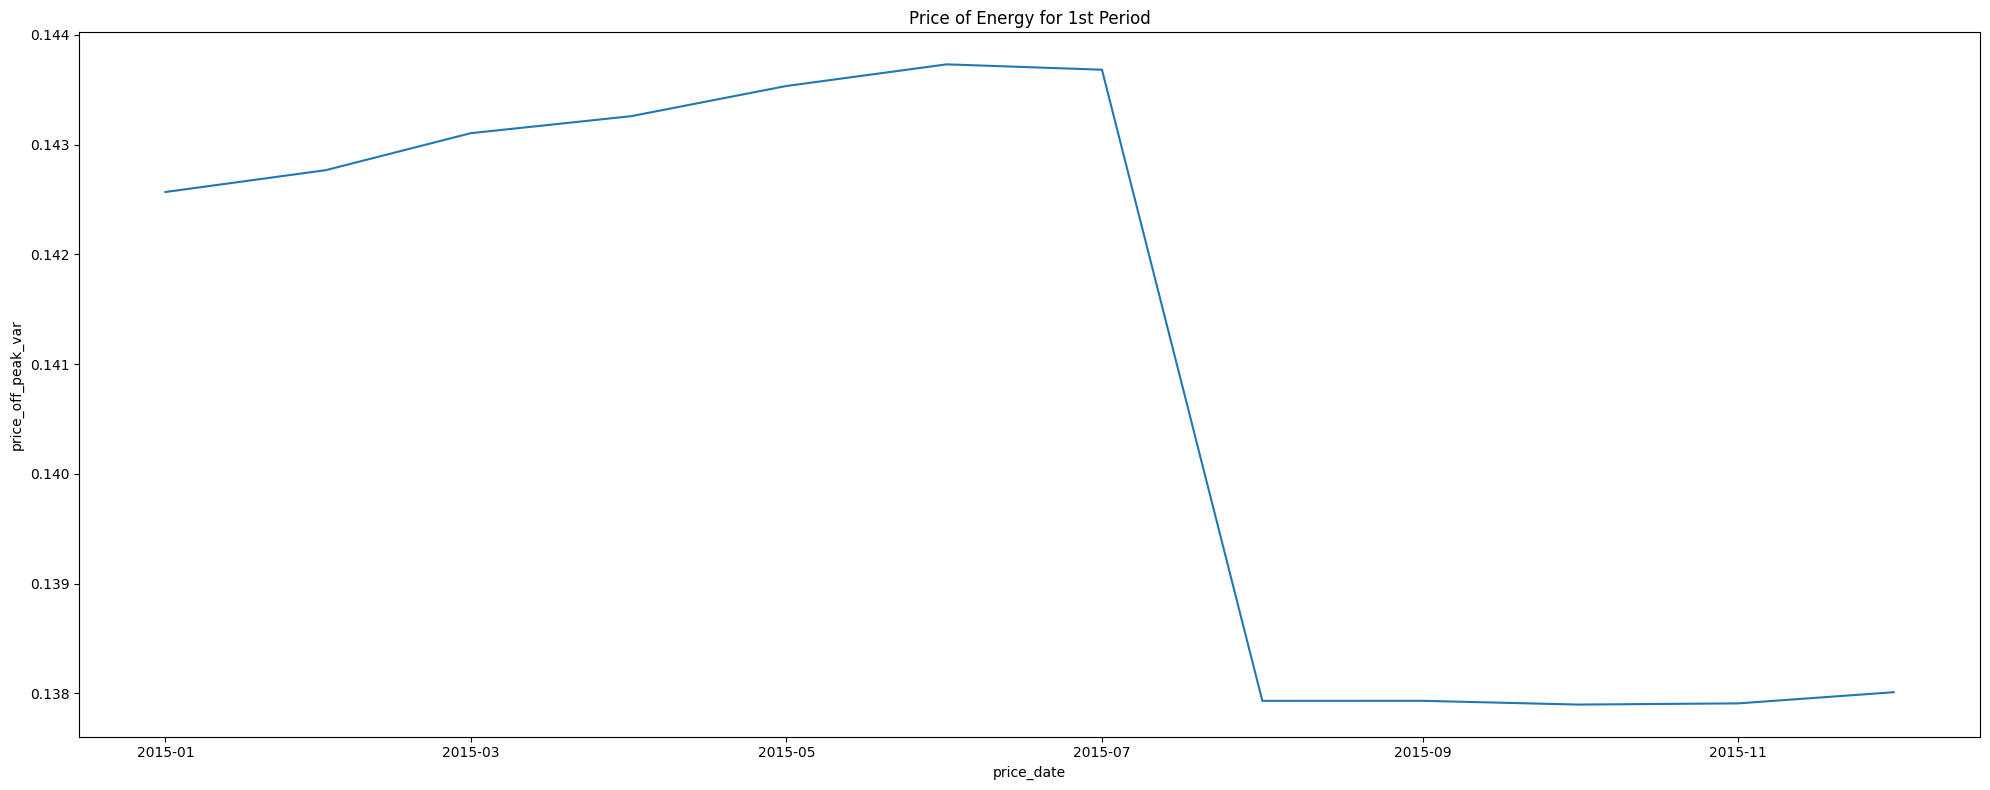

In [59]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_off_peak_var',estimator='mean',ci=None)
plt.title('Price of Energy for 1st Period')
plt.tight_layout()

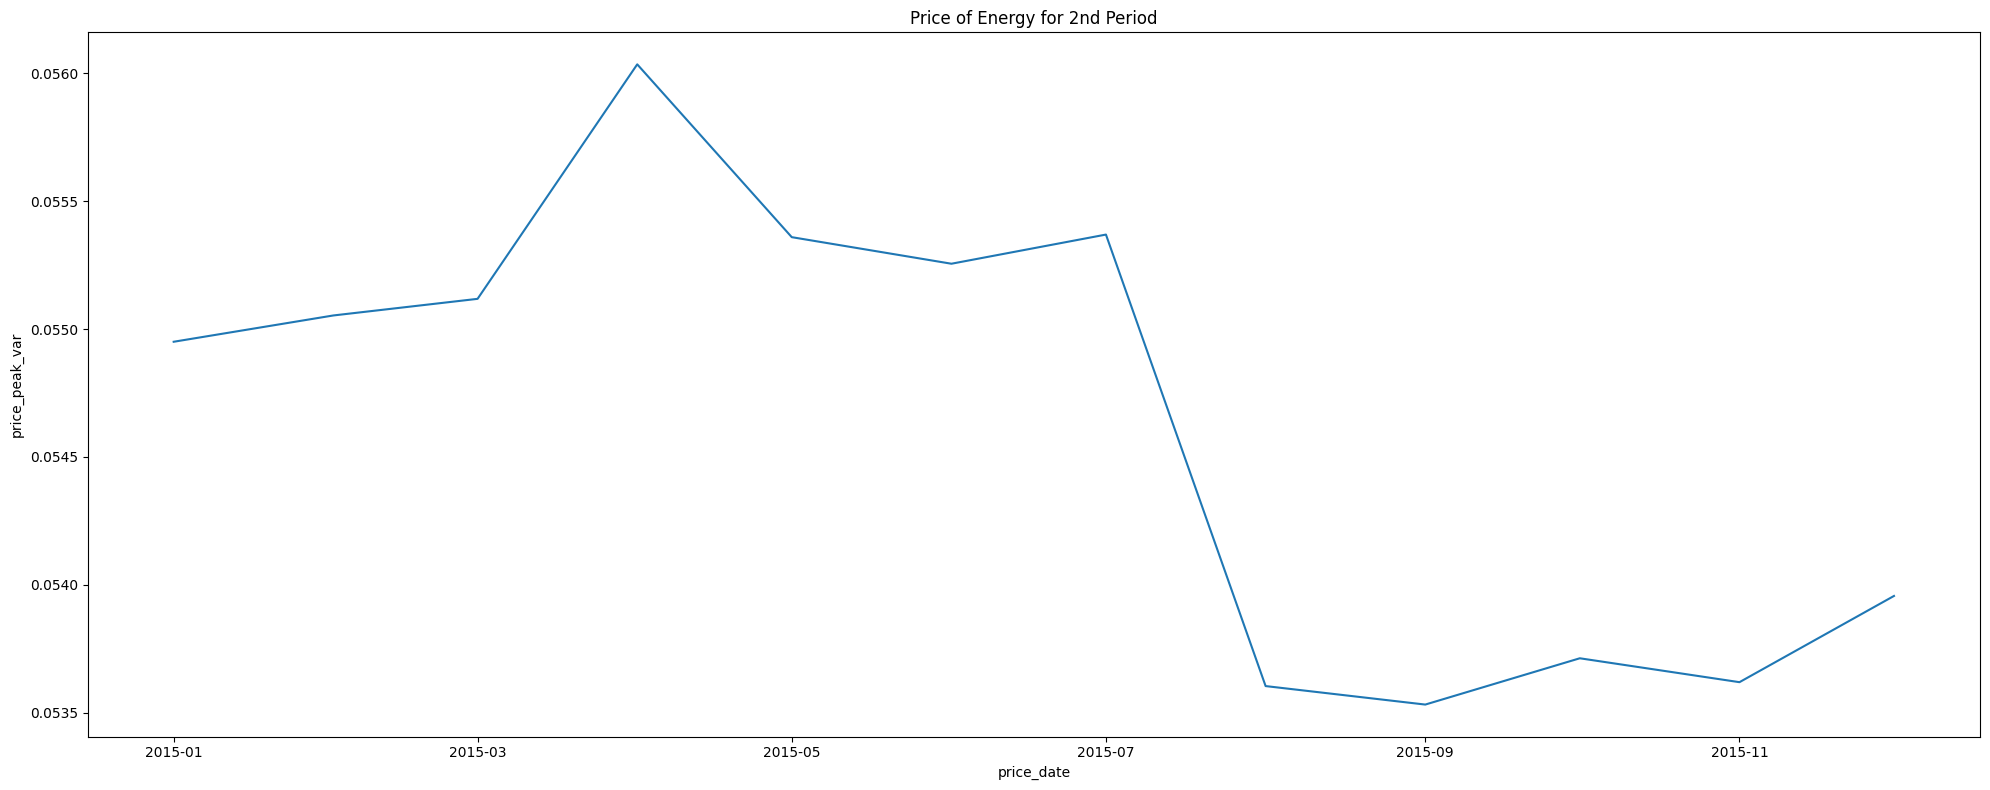

In [58]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df.price_date,y=df.price_peak_var,estimator='mean',ci=None)
plt.title('Price of Energy for 2nd Period')
plt.tight_layout()

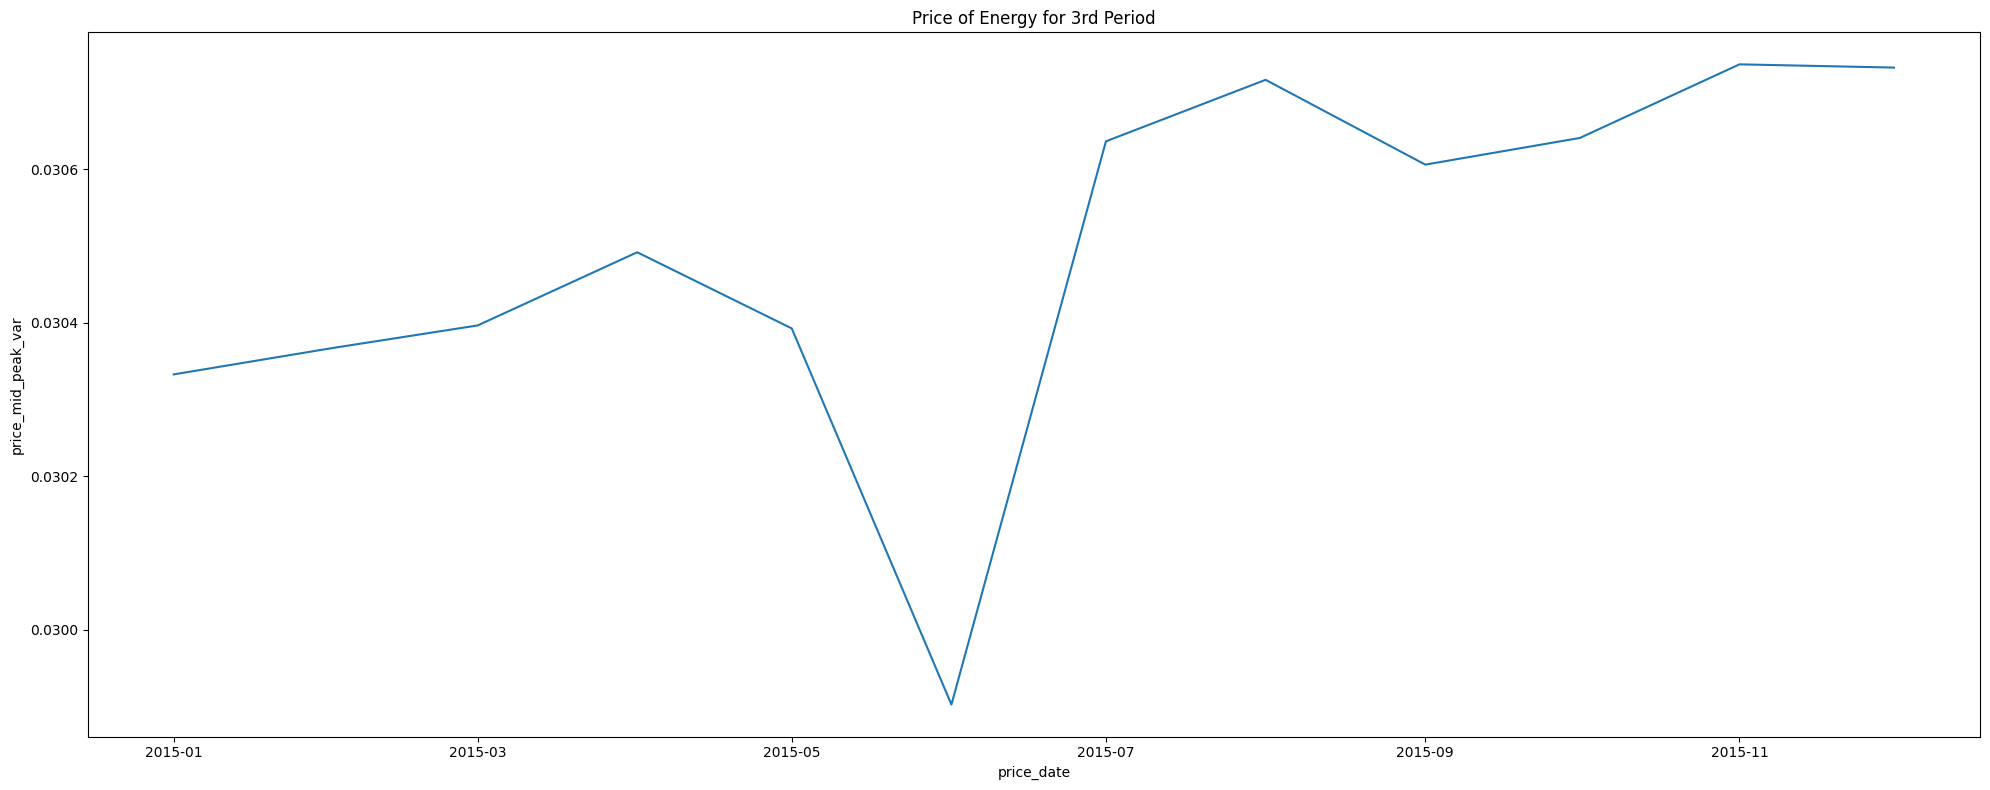

In [60]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_mid_peak_var',estimator='mean',ci=None)
plt.title('Price of Energy for 3rd Period')
plt.tight_layout()

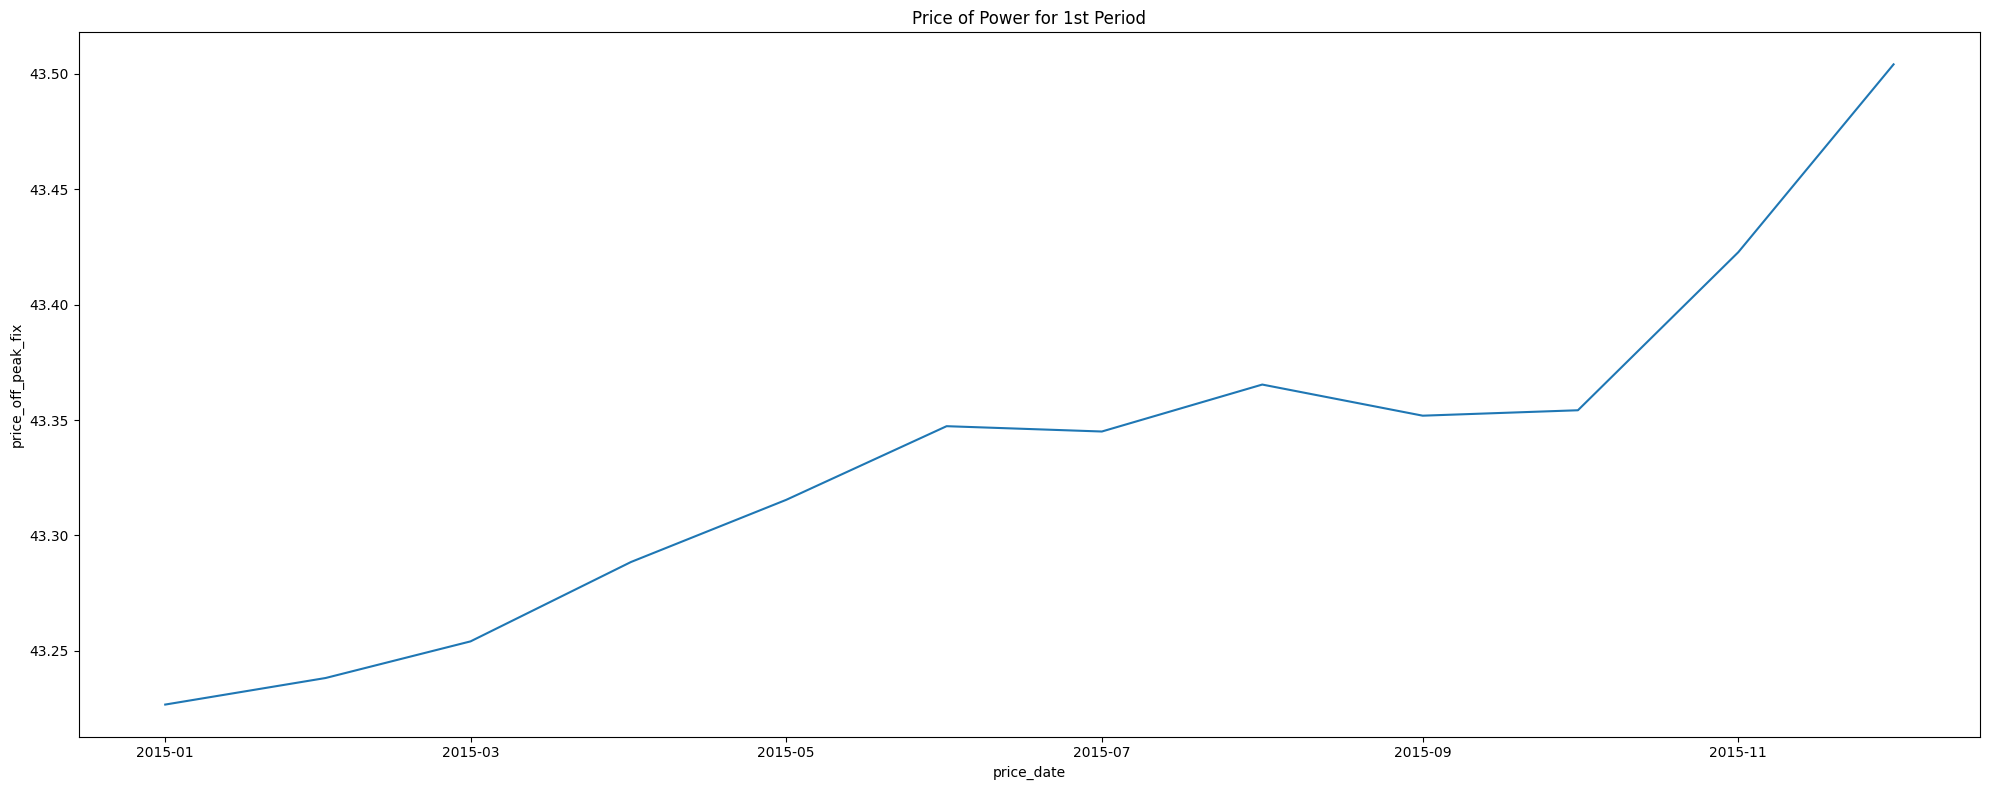

In [61]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_off_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 1st Period')
plt.tight_layout()

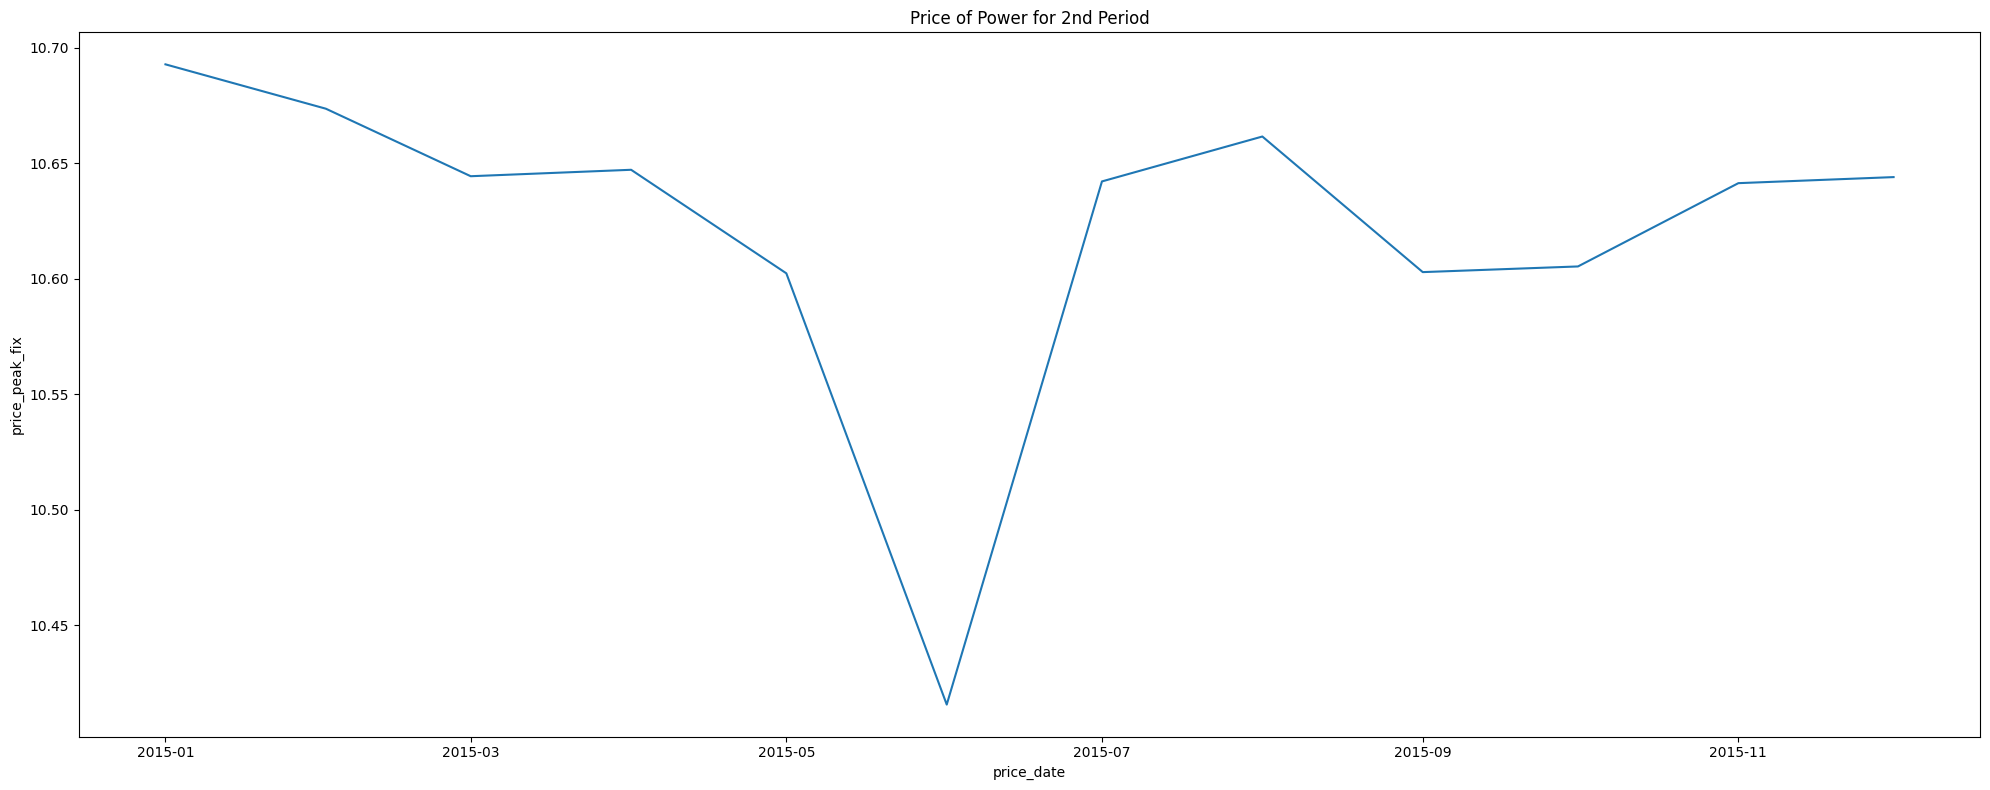

In [62]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 2nd Period')
plt.tight_layout()

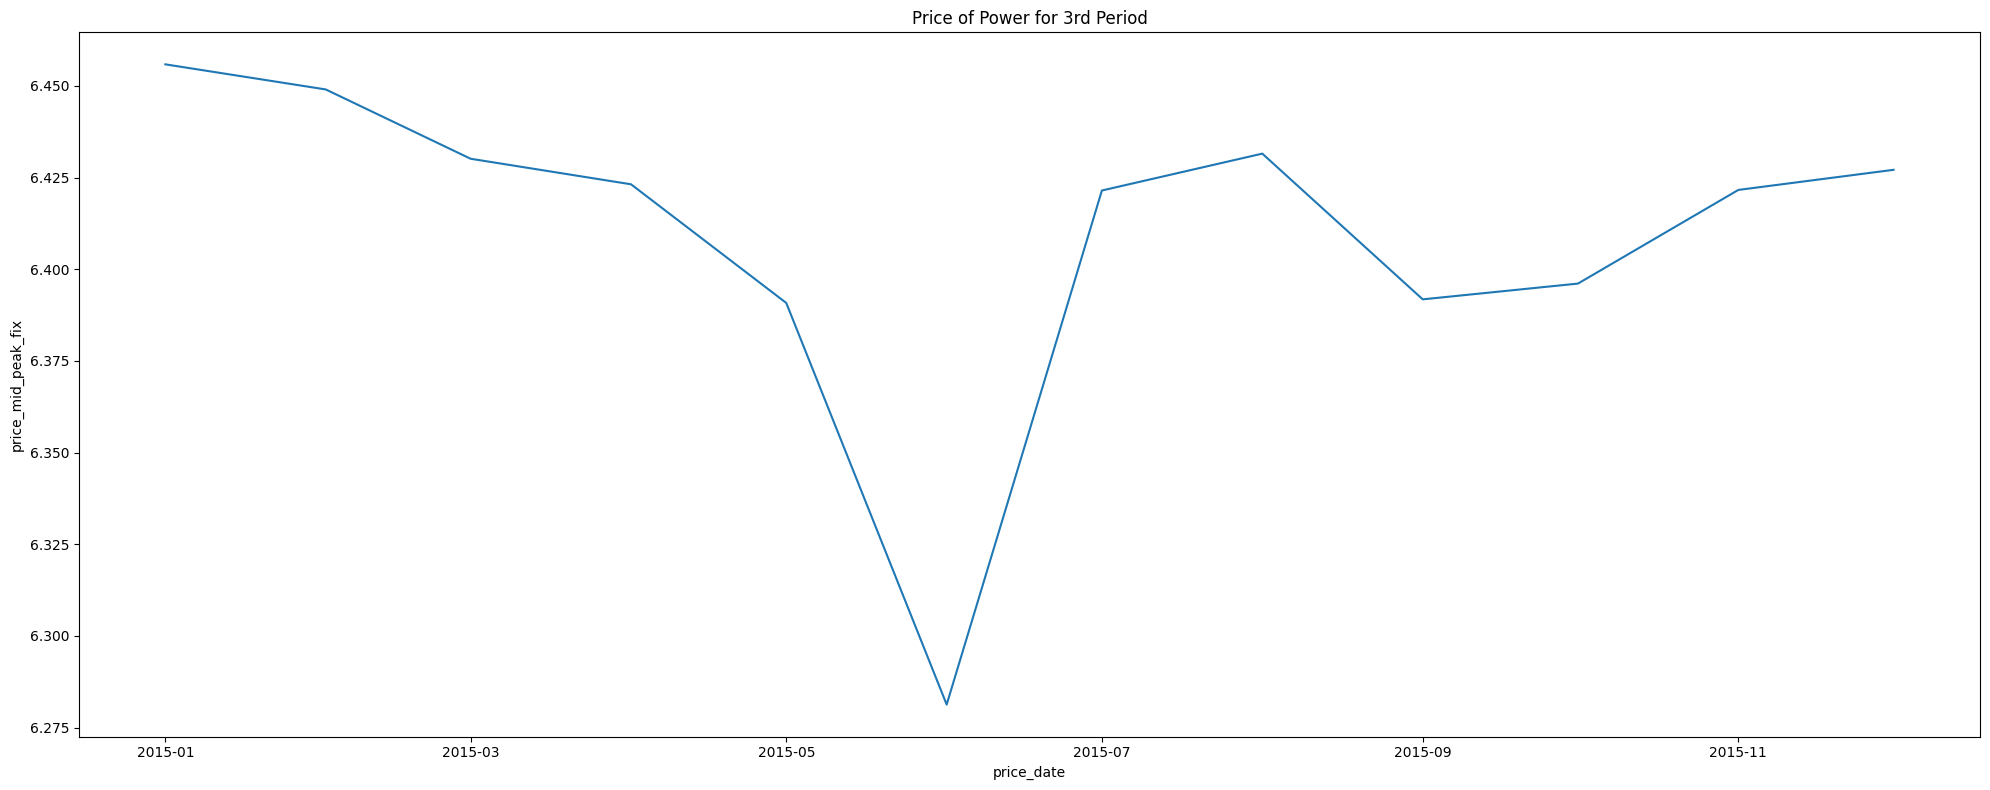

In [63]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_mid_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 3rd Period')
plt.tight_layout()

# Correlations

In [65]:
df.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


<Axes: >

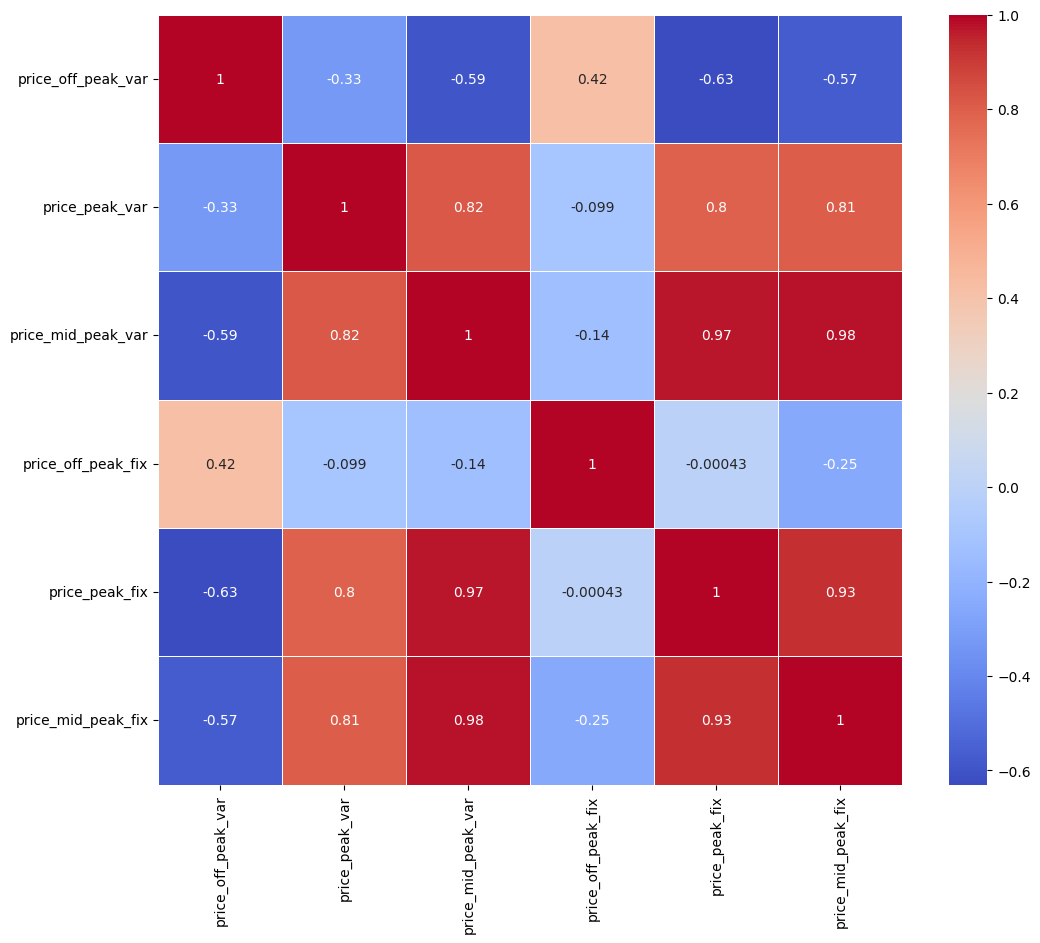

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=0.5,linecolor='white')

Conclusion: Period 2nd and 3rd is highly correlated